In [1]:
#Face image data compression using PCA:
#Loading LFW dataset:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


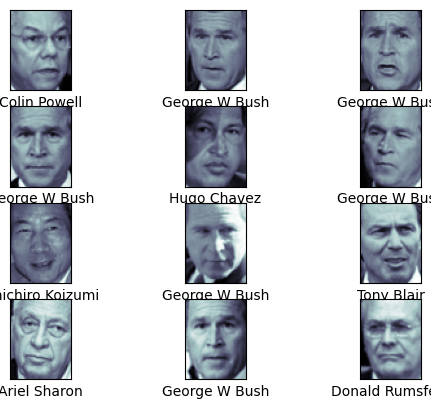

In [4]:
#Showing few of the images:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(4, 3)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [2]:
#Creating a PCA instance
from sklearn.decomposition import PCA
pca = PCA(500)
pca.fit(faces.data)

PCA(n_components=500)

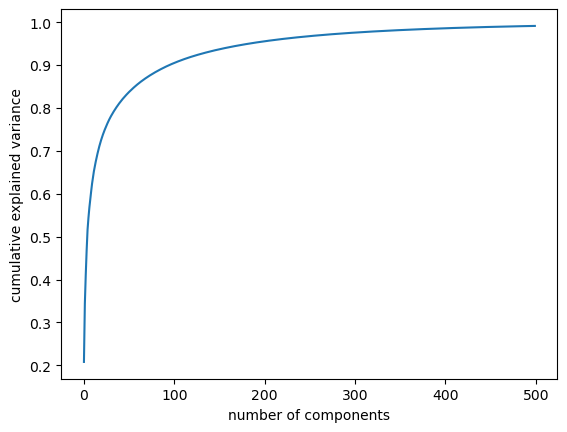

In [5]:
#Lets See commultative variance:
import numpy as np
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [31]:
# Compute the components and projected faces
pca = PCA(500).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

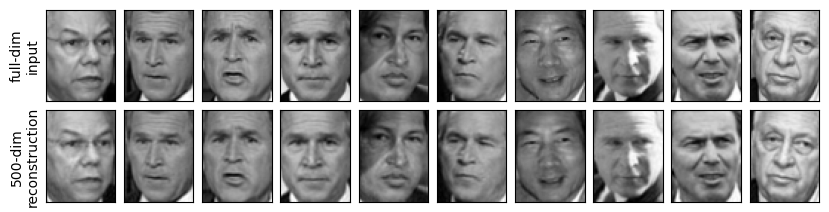

In [32]:
#COmparing the original and reconstructed faces:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('500-dim\nreconstruction');